### Exercise


Here is [the dataset](https://www.kaggle.com/datasets/datasnaek/mbti-type) from kaggle for you to work your text classification.
 
__Questionaire__
1. What Bayes Theorem?

2. Why NB classifier is fast in compared with SVM?

3. What different type of vectorizers are there? And how do they added “variable sentence length” problem?

4. Why Laplace Transformation is used in NB Classifier?

5. Why do we need different evaluation metrics? Explain difference between Recall and Precision?

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv(r"C:\Users\Prasad\Desktop\ml\data_ml\mbti_1.csv")

In [12]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [14]:
X = df['posts']
y = df['type']

In [16]:
X.head(), y.head()

(0    'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
 1    'I'm finding the lack of me in these posts ver...
 2    'Good one  _____   https://www.youtube.com/wat...
 3    'Dear INTP,   I enjoyed our conversation the o...
 4    'You're fired.|||That's another silly misconce...
 Name: posts, dtype: object,
 0    INFJ
 1    ENTP
 2    INTP
 3    INTJ
 4    ENTJ
 Name: type, dtype: object)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



In [24]:
X.shape, y.shape

((8675,), (8675,))

In [26]:
vect = CountVectorizer(ngram_range=(1,3), min_df=5, max_features=8000)
X_vec = vect.fit_transform(X).toarray();
X_vec[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
X_vec.shape


(8675, 8000)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, random_state=0)

In [44]:
%%time

nb = GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_train,y_train), nb.score(X_test, y_test)

CPU times: total: 11.6 s
Wall time: 11.8 s


(0.7758991699969259, 0.34071000461041956)

In [46]:
sample = ' HI everyone nice to see you all here.'
vec = vect.transform([sample]).toarray()
nb.predict(vec)

array(['ESFJ'], dtype='<U4')

In [90]:
predicted = []
for i in X_test:
    s = nb.predict([i])
    predicted.append(s)
predicted

[array(['ENFP'], dtype='<U4'),
 array(['ENFP'], dtype='<U4'),
 array(['ENFP'], dtype='<U4'),
 array(['INTP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INTJ'], dtype='<U4'),
 array(['INTJ'], dtype='<U4'),
 array(['INFJ'], dtype='<U4'),
 array(['ISTP'], dtype='<U4'),
 array(['ENFP'], dtype='<U4'),
 array(['INTP'], dtype='<U4'),
 array(['INFJ'], dtype='<U4'),
 array(['ENTP'], dtype='<U4'),
 array(['INTJ'], dtype='<U4'),
 array(['ISTP'], dtype='<U4'),
 array(['INTP'], dtype='<U4'),
 array(['INTP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INTP'], dtype='<U4'),
 array(['ISTP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INFJ'], dtype='<U4'),
 array(['INTJ'], dtype='<U4'),
 array(['INFJ'], dtype='<U4'),
 array(['INFJ'], dtype='<U4'),
 array(['INTP'], dtype='<U4'),
 array(['ISFP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array([

In [100]:
# y_test , 
predicted

[array(['ENFP'], dtype='<U4'),
 array(['ENFP'], dtype='<U4'),
 array(['ENFP'], dtype='<U4'),
 array(['INTP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INTJ'], dtype='<U4'),
 array(['INTJ'], dtype='<U4'),
 array(['INFJ'], dtype='<U4'),
 array(['ISTP'], dtype='<U4'),
 array(['ENFP'], dtype='<U4'),
 array(['INTP'], dtype='<U4'),
 array(['INFJ'], dtype='<U4'),
 array(['ENTP'], dtype='<U4'),
 array(['INTJ'], dtype='<U4'),
 array(['ISTP'], dtype='<U4'),
 array(['INTP'], dtype='<U4'),
 array(['INTP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INTP'], dtype='<U4'),
 array(['ISTP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array(['INFJ'], dtype='<U4'),
 array(['INTJ'], dtype='<U4'),
 array(['INFJ'], dtype='<U4'),
 array(['INFJ'], dtype='<U4'),
 array(['INTP'], dtype='<U4'),
 array(['ISFP'], dtype='<U4'),
 array(['INFP'], dtype='<U4'),
 array([

In [54]:
print("Welcome to predicting your personality type using your sentences. So enter few words describing yourself and get to know you personality.")

sent = input("ENter info")
vec1 = vect.transform([sent]).toarray()
nb.predict(vec1)

Welcome to predicting your personality type using your sentences. So enter few words describing yourself and get to know you personality.


ENter info I love to code , eat panipuri and spdp, love to watch ott.


array(['ESFJ'], dtype='<U4')

In [58]:
y.value_counts()

type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64

In [103]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 
# cfm = confusion_matrix(y_test, nb.predict(X_test))
# cfm
cm = confusion_matrix(y_test,predicted)

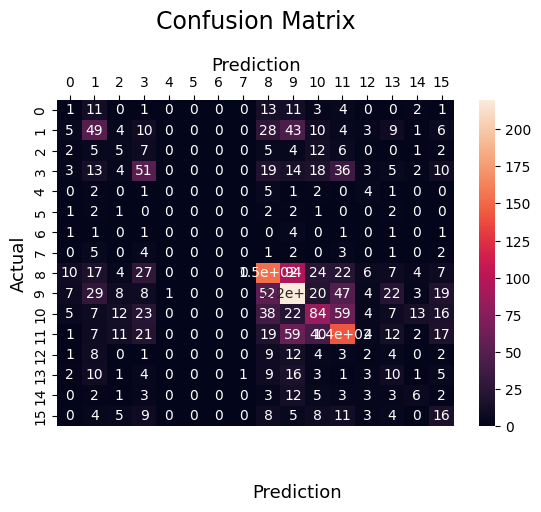

In [117]:
sns.heatmap(cm, 
            annot=True)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [113]:
X.head()

0    'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1    'I'm finding the lack of me in these posts ver...
2    'Good one  _____   https://www.youtube.com/wat...
3    'Dear INTP,   I enjoyed our conversation the o...
4    'You're fired.|||That's another silly misconce...
Name: posts, dtype: object

In [124]:
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

        ENFJ       0.03      0.02      0.02        47
        ENFP       0.28      0.28      0.28       172
        ENTJ       0.09      0.10      0.10        49
        ENTP       0.30      0.29      0.29       178
        ESFJ       0.00      0.00      0.00        16
        ESFP       0.00      0.00      0.00        11
        ESTJ       0.00      0.00      0.00        10
        ESTP       0.00      0.00      0.00        18
        INFJ       0.42      0.41      0.41       375
        INFP       0.42      0.50      0.46       440
        INTJ       0.36      0.29      0.32       290
        INTP       0.42      0.42      0.42       335
        ISFJ       0.05      0.04      0.05        46
        ISFP       0.11      0.15      0.13        66
        ISTJ       0.17      0.14      0.15        43
        ISTP       0.15      0.22      0.18        73

    accuracy                           0.34      2169
   macro avg       0.18   

C:\Users\Prasad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prasad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prasad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
